In [208]:
import pandas as pd
import matplotlib.pyplot as plt

In [209]:
# Membaca data dari file CSV
file_name = '../../tamlops/data/infra/fcfs-normal/gpu.csv'
df = pd.read_csv(file_name)  # Ganti 'nama_file.csv' dengan nama file CSV Anda
df = df[df['timestamp'] != 'timestamp']
print(df.head(5))

                 timestamp             name  pstate  temperature.gpu  \
0  2023/12/07 17:01:38.112   A100-SXM4-40GB      P0               29   
1  2023/12/07 17:01:38.114   A100-SXM4-40GB      P0               28   
2  2023/12/07 17:01:38.116   A100-SXM4-40GB      P0               50   
3  2023/12/07 17:01:38.117   A100-SXM4-40GB      P0               35   
4  2023/12/07 17:01:38.121   A100-SXM4-40GB      P0               39   

   utilization.gpu [%]  utilization.memory [%]  memory.total [MiB]  \
0                  0 %                     0 %           40537 MiB   
1                  0 %                     0 %           40537 MiB   
2                 99 %                    31 %           40537 MiB   
3                  0 %                     0 %           40537 MiB   
4                 40 %                    16 %           40537 MiB   

   memory.free [MiB]  memory.used [MiB]  
0          36684 MiB           3853 MiB  
1          34132 MiB           6405 MiB  
2           5727 MiB

In [210]:
# Add Column
# Removing the last 4 characters from 'columnA'
df[' memory.used [MiB]'] = df[' memory.used [MiB]'].str[:-4]
df[' memory.total [MiB]'] = df[' memory.total [MiB]'].str[:-4]

df[' memory.used [MiB]'] = pd.to_numeric(df[' memory.used [MiB]'], errors='coerce')
df[' memory.total [MiB]'] = pd.to_numeric(df[' memory.total [MiB]'], errors='coerce')
df['real memory usage'] = df[' memory.used [MiB]'] / df[' memory.total [MiB]']
df['real memory usage'] = df['real memory usage'] * 100

print(df.head(10))

                  timestamp             name  pstate  temperature.gpu  \
0   2023/12/07 17:01:38.112   A100-SXM4-40GB      P0               29   
1   2023/12/07 17:01:38.114   A100-SXM4-40GB      P0               28   
2   2023/12/07 17:01:38.116   A100-SXM4-40GB      P0               50   
3   2023/12/07 17:01:38.117   A100-SXM4-40GB      P0               35   
4   2023/12/07 17:01:38.121   A100-SXM4-40GB      P0               39   
5   2023/12/07 17:01:38.131   A100-SXM4-40GB      P0               45   
6   2023/12/07 17:01:38.133   A100-SXM4-40GB      P0               51   
7   2023/12/07 17:01:38.134   A100-SXM4-40GB      P0               36   
9   2023/12/07 17:01:41.356   A100-SXM4-40GB      P0               29   
10  2023/12/07 17:01:41.357   A100-SXM4-40GB      P0               28   

    utilization.gpu [%]  utilization.memory [%]   memory.total [MiB]  \
0                   0 %                     0 %                40537   
1                   0 %                     0 %     

In [211]:
print(df.columns)

Index(['timestamp', ' name', ' pstate', ' temperature.gpu',
       ' utilization.gpu [%]', ' utilization.memory [%]',
       ' memory.total [MiB]', ' memory.free [MiB]', ' memory.used [MiB]',
       'real memory usage'],
      dtype='object')


In [212]:
# Beri labeling GPU
df.reset_index(drop=True, inplace=True)

counter = 0
for index, row in df.iterrows():
    if counter == 8:
        counter = 0
    df.at[index, ' name'] =  df.at[index, ' name'] + "-" + str(counter)
    counter += 1
print(df.head(10))

                 timestamp               name  pstate  temperature.gpu  \
0  2023/12/07 17:01:38.112   A100-SXM4-40GB-0      P0               29   
1  2023/12/07 17:01:38.114   A100-SXM4-40GB-1      P0               28   
2  2023/12/07 17:01:38.116   A100-SXM4-40GB-2      P0               50   
3  2023/12/07 17:01:38.117   A100-SXM4-40GB-3      P0               35   
4  2023/12/07 17:01:38.121   A100-SXM4-40GB-4      P0               39   
5  2023/12/07 17:01:38.131   A100-SXM4-40GB-5      P0               45   
6  2023/12/07 17:01:38.133   A100-SXM4-40GB-6      P0               51   
7  2023/12/07 17:01:38.134   A100-SXM4-40GB-7      P0               36   
8  2023/12/07 17:01:41.356   A100-SXM4-40GB-0      P0               29   
9  2023/12/07 17:01:41.357   A100-SXM4-40GB-1      P0               28   

   utilization.gpu [%]  utilization.memory [%]   memory.total [MiB]  \
0                  0 %                     0 %                40537   
1                  0 %                     

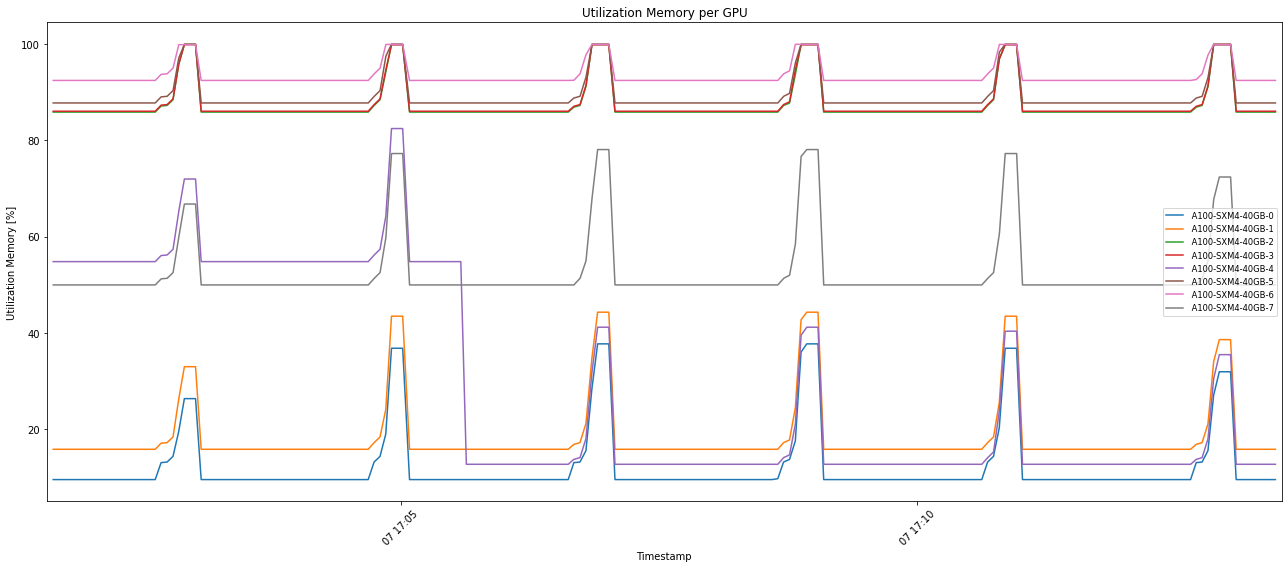

In [213]:
# Mengonversi kolom 'timestamp' ke dalam format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Mengelompokkan data berdasarkan nama GPU
grouped = df.groupby(' name')

# Plotting grafik untuk setiap GPU
plt.figure(figsize=(18, 8))

for name, group in grouped:
    plt.plot(group['timestamp'], group['real memory usage'], label=name)

plt.xlabel('Timestamp')
plt.ylabel('Utilization Memory [%]')
plt.title('Utilization Memory per GPU')
plt.legend(fontsize='small')
plt.xticks(rotation=45)
plt.gca().margins(x=0.005)
plt.tight_layout()
plt.show()

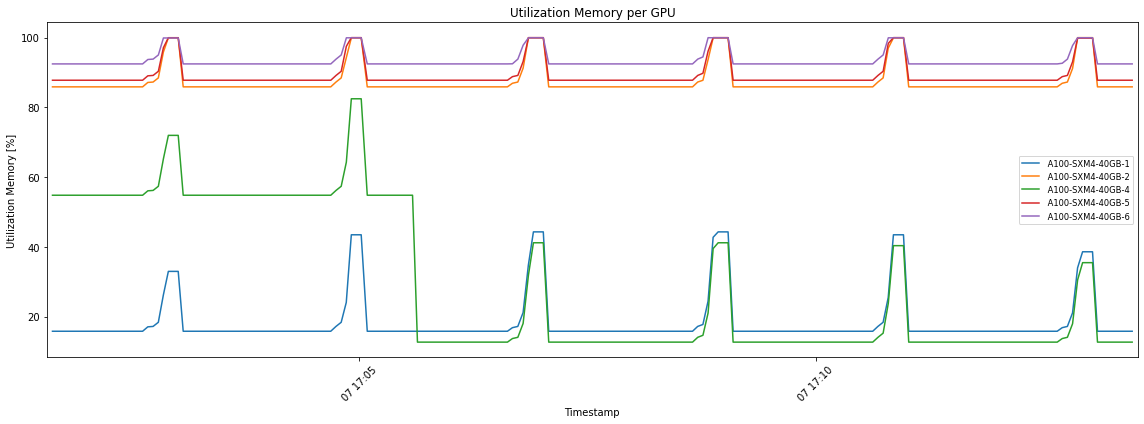

In [214]:
# Assuming 'df' is your DataFrame and it's already grouped by 'name'
grouped = df.groupby(' name')

# List of group names you want to drop
groups_to_drop = [' A100-SXM4-40GB-0', ' A100-SXM4-40GB-7', ' A100-SXM4-40GB-3']

# Filtering out specific groups
filtered_data = df[~df[' name'].isin(groups_to_drop)]

# Re-grouping after filtering
grouped_filtered = filtered_data.groupby(' name')

# Plotting grafik untuk setiap GPU
plt.figure(figsize=(16, 6))

for name, group in grouped_filtered:
    plt.plot(group['timestamp'], group['real memory usage'], label=name)

plt.xlabel('Timestamp')
plt.ylabel('Utilization Memory [%]')
plt.title('Utilization Memory per GPU')
plt.legend(fontsize='small')
plt.xticks(rotation=45)
plt.gca().margins(x=0.005)
plt.tight_layout()
plt.show()